Found 978 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Epoch 1/30


c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5466 - loss: 0.8351 - val_accuracy: 0.6667 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5274 - loss: 0.7262 - val_accuracy: 0.3333 - val_loss: 0.6970 - learning_rate: 9.5000e-04
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4367 - loss: 0.6969 - val_accuracy: 0.3374 - val_loss: 0.6976 - learning_rate: 9.0250e-04
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4933 - loss: 0.6860 - val_accuracy: 0.3333 - val_loss: 0.6994 - learning_rate: 8.5737e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6468 - loss: 0.6513
Validation Loss: 0.6418607831001282
Validation Accuracy: 0.6666666865348816
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.73      1.00      0.85       164
         ALS       0.00      0.00      0.00        60

    accuracy               

c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Priyamvadha Pradeep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

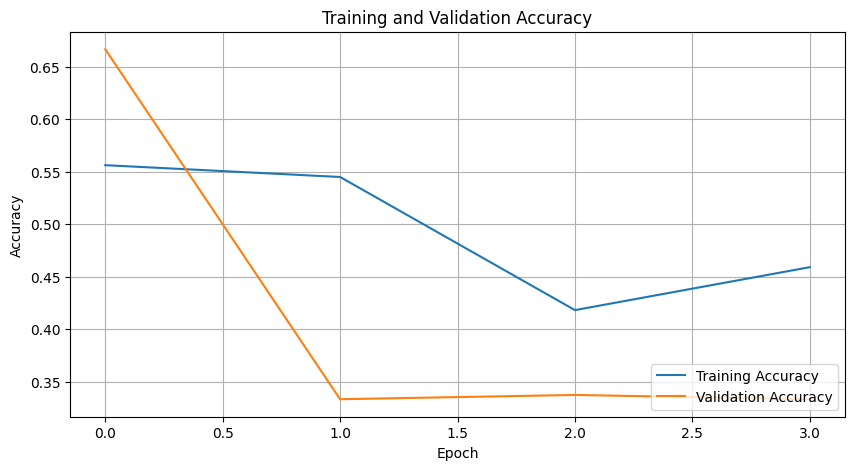

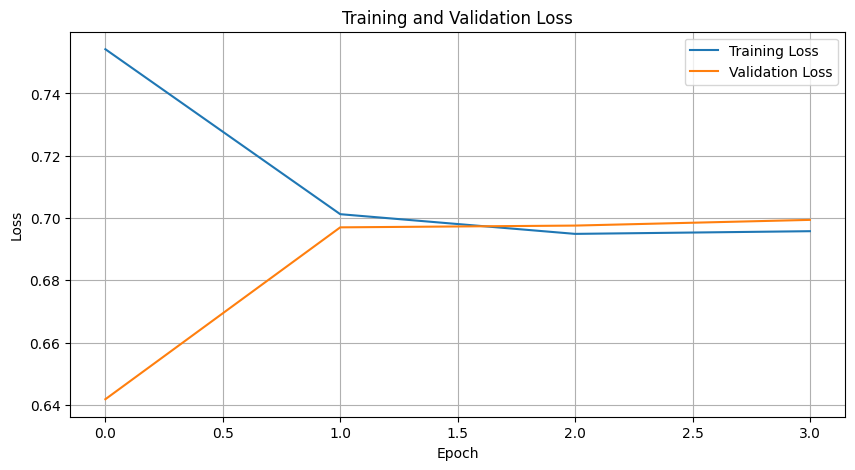

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
File: CT010_phonationA_spectrogram.png, Prediction: No ALS Detected
File: CT010_phonationE_spectrogram.png, Prediction: No ALS Detected
File: CT010_phonationI_spectrogram.png, Prediction: No ALS Detected
File: CT061_rhythmKA_spectrogram.png, Prediction: No ALS Detected
File: CT061_rhythmPA_spectrogram.png, Prediction: No ALS Detected
File: CT061_rhythmTA_spectrogram.png, Prediction: No ALS Detected
File: PZ008_rhythmPA_spectrogram.png, Prediction: No ALS Detected
File: PZ008_rhythmTA_spectrogram.png, Prediction: No ALS Detecte

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models

# Define paths
train_dir = r"C:\Users\Priyamvadha Pradeep\Desktop\FYP\CNN\New Models\train"
val_dir = r"C:\Users\Priyamvadha Pradeep\Desktop\FYP\CNN\New Models\validate"

# Image parameters
img_width, img_height = 128, 128
batch_size = 32
epochs = 30  # Increased epochs

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,   # Added rotation for more augmentation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    brightness_range=[0.2, 1.0]  # Random brightness
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data with flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Calculate class weights to address imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))

# Load VGG19 as the base model
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Unfreeze the last few layers of VGG19 for fine-tuning
for layer in vgg_base.layers[:15]:  # Freeze the first 15 layers, unfreeze the rest
    layer.trainable = False

for layer in vgg_base.layers[15:]:  # Unfreeze the remaining layers
    layer.trainable = True

# Build the model
model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (ALS vs Healthy)
])

# Compile the model with an optimizer
optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate for fine-tuning
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up learning rate scheduler and early stopping callbacks
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.95 ** epoch)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights,  # Use class weights to handle imbalance
    callbacks=[lr_schedule, early_stopping]
)

# Save the model
model.save('vgg19_als_classifier_finetuned.keras')

# Evaluate the model on validation data
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Get predictions and ground truth for validation data
Y_pred = model.predict(val_generator, steps=val_generator.samples // batch_size)
y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_true = val_generator.classes[:len(y_pred)]

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Healthy', 'ALS']))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Function to load images from a folder and make predictions
def predict_images_from_folder(folder_path, model):
    results = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = image.load_img(img_path, target_size=(img_width, img_height))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0

            # Make prediction
            prediction = model.predict(img_array)
            class_label = 'ALS Detected' if prediction[0][0] > 0.5 else 'No ALS Detected'
            results.append((filename, class_label))

    return results

# Path to the folder containing images to predict
test_folder_path = r"C:\Users\Priyamvadha Pradeep\Desktop\FYP\CNN\New Models\test"

# Call the prediction function
predictions = predict_images_from_folder(test_folder_path, model)

# Print the results
for filename, result in predictions:
    print(f'File: {filename}, Prediction: {result}')
